<a href="https://colab.research.google.com/github/Samave02/HoneyTic-/blob/main/Beehives/beehives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context**


Este conjunto de datos forma parte de mi tesis de maestría "Sistema de monitoreo de colmenas inteligente basado en aprendizaje automático sin red de Internet".
Datos recopilados de las colmenas número 17, 36 y 85 en un colmenar ubicado en **Çanakkale, Turquía.**

Los datos se utilizaron con algoritmos de detección de anomalías no supervisados ​​para determinar los **valores críticos** de **temperatura** y **humedad relativa** para calibrar el sistema de alarma.

Los resultados mostraron que **las anomalías fatales se pueden detectar semanas antes de la pérdida de la colonia.**

**Contenido**

+1000 filas y 10 columnas.
La descripción de las columnas se enumera a continuación.

* *DateTime* : Fecha y hora en formato "dd.mm.aaaa hh:mm"
* *T17* : Temperatura de la colmena 17
* *RH17* : Humedad relativa de la colmena 17
* *AT17* : Temperatura aparente de la colmena 17
* *Tamb* : Temperatura ambiente
* *RHamb* : Humedad relativa ambiente
* *ATamb* : Temperatura ambiente aparente
* *T17-Tamb* : T17 - Tamb
* *AT17-ATamb* : AT17 - ATamb

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df_hive17 = pd.read_csv('https://raw.githubusercontent.com/Samave02/HoneyTic-/main/Beehives/Hive17.csv', sep=';')
df_hive36 = pd.read_csv('https://raw.githubusercontent.com/Samave02/HoneyTic-/main/Beehives/Hive36.csv', sep=';')
df_hive85 = pd.read_csv('https://raw.githubusercontent.com/Samave02/HoneyTic-/main/Beehives/Hive85.csv', sep=';')

In [2]:
df_hive17['Hive'] = 17
df_hive17 = df_hive17.rename(columns={'T17': 'T',
                          'RH17': 'RH',
                          'AT17': 'AT',
                          'T17-Tamb':'T-Tamb',
                          'AT17-ATamb':'AT-ATamb'})
df_hive17.head()

,Hour,DateTime,T,RH,AT,Tamb,RHamb,ATamb,T-Tamb,AT-ATamb,Hive
0,1,21.08.2021 14:00,32.8,47,36.6,28.8,33,29.1,4.0,7.5,17
1,2,21.08.2021 15:00,33.3,46,37.1,28.8,36,29.5,4.5,7.6,17
2,3,21.08.2021 16:00,33.5,46,37.4,28.9,35,29.5,4.6,7.9,17
3,4,21.08.2021 17:00,33.8,49,38.5,28.5,36,29.1,5.3,9.3,17
4,5,21.08.2021 18:00,33.8,51,38.8,27.5,40,28.4,6.3,10.4,17


In [3]:
df_hive17.shape

(1847, 11)

In [4]:
df_hive36['Hive'] = 36
df_hive36 = df_hive36.rename(columns={'T36': 'T',
                          'RH36': 'RH',
                          'AT36': 'AT',
                          'T36-Tamb':'T-Tamb',
                          'AT36-ATamb':'AT-ATamb'})
df_hive36.head()

,Hour,DateTime,T,RH,AT,Tamb,RHamb,ATamb,T-Tamb,AT-ATamb,Hive
0,1847,6.11.2021 12:00,29.2,66,34.3,23.6,49,24.3,5.6,10.0,36
1,1848,6.11.2021 13:00,27.3,71,31.9,25.1,43,25.5,2.2,6.4,36
2,1849,6.11.2021 14:00,28.3,69,33.2,25.7,40,26.0,2.6,7.3,36
3,1850,6.11.2021 15:00,29.3,67,34.5,24.6,49,25.6,4.7,8.9,36
4,1851,6.11.2021 16:00,30.1,66,35.5,23.4,51,24.2,6.7,11.3,36


In [5]:
df_hive36.shape

(4227, 11)

In [6]:
df_hive85['Hive'] = 85
df_hive85 = df_hive85.rename(columns={'T85': 'T',
                          'RH85': 'RH',
                          'AT85': 'AT',
                          'T85-Tamb':'T-Tamb',
                          'AT85-ATamb':'AT-ATamb'})
df_hive85.head()

,Hour,DateTime,T,RH,AT,Tamb,RHamb,ATamb,T-Tamb,AT-ATamb,Hive
0,1,21.08.2021 14:00,36.3,78,48.4,28.8,33,29.1,7.5,19.3,85
1,2,21.08.2021 15:00,34.9,83,46.7,28.8,36,29.5,6.1,17.1,85
2,3,21.08.2021 16:00,34.1,87,45.9,28.9,35,29.5,5.2,16.4,85
3,4,21.08.2021 17:00,34.2,89,46.5,28.5,36,29.1,5.7,17.4,85
4,5,21.08.2021 18:00,33.9,90,46.2,27.5,40,28.4,6.4,17.8,85


In [7]:
# Unir los DataFrames df_hive17, df_hive36 y df_hive85 utilizando un merge externo
df_hive = pd.merge(df_hive17, df_hive36, how='outer').merge(df_hive85, how='outer')

# Separar la columna 'DateTime' en 'Fecha' y 'Hora'
df_hive[['Fecha', 'Tiempo']] = df_hive['DateTime'].str.split(' ', expand=True)

# Eliminar la columna 'DateTime' ya que no se necesita más
df_hive.drop('DateTime', axis=1, inplace=True)

# Reordenar las columnas para que 'Fecha' y 'Hora' estén al inicio
first_column = df_hive.columns[0]  # Obtener la primera columna existente

# Crear una nueva lista de columnas con 'Fecha' y 'Hora' después de la primera columna
cols = [first_column, 'Fecha', 'Tiempo'] + [col for col in df_hive.columns if col not in [first_column, 'Fecha', 'Tiempo']]
df_hive = df_hive[cols]

# Mostrar las primeras filas del DataFrame resultante
df_hive.head()

,Hour,Fecha,Tiempo,T,RH,AT,Tamb,RHamb,ATamb,T-Tamb,AT-ATamb,Hive
0,1,21.08.2021,14:00,32.8,47,36.6,28.8,33,29.1,4.0,7.5,17
1,2,21.08.2021,15:00,33.3,46,37.1,28.8,36,29.5,4.5,7.6,17
2,3,21.08.2021,16:00,33.5,46,37.4,28.9,35,29.5,4.6,7.9,17
3,4,21.08.2021,17:00,33.8,49,38.5,28.5,36,29.1,5.3,9.3,17
4,5,21.08.2021,18:00,33.8,51,38.8,27.5,40,28.4,6.3,10.4,17


In [8]:
df_hive = df_hive.rename(columns= {'Hour':'Hora','T':'Temp','RH':'humRel','AT':'tempApte',
                         'Tamb':'tempAmbte','RHamb':'humRelAmbte','ATamb':'tempApteAmbte',
                         'T-Tamb':'difTemp','AT-ATamb':'difTempApte'})
df_hive.head()

,Hora,Fecha,Tiempo,Temp,humRel,tempApte,tempAmbte,humRelAmbte,tempApteAmbte,difTemp,difTempApte,Hive
0,1,21.08.2021,14:00,32.8,47,36.6,28.8,33,29.1,4.0,7.5,17
1,2,21.08.2021,15:00,33.3,46,37.1,28.8,36,29.5,4.5,7.6,17
2,3,21.08.2021,16:00,33.5,46,37.4,28.9,35,29.5,4.6,7.9,17
3,4,21.08.2021,17:00,33.8,49,38.5,28.5,36,29.1,5.3,9.3,17
4,5,21.08.2021,18:00,33.8,51,38.8,27.5,40,28.4,6.3,10.4,17


In [9]:
# Eliminar las columnas 'Hour', 'T-Tamb', 'AT-ATamb' y 'Hive'
df_hive.drop(columns=['Hora', 'difTemp', 'difTempApte', 'Hive'], inplace=True)
df_hive

,Fecha,Tiempo,Temp,humRel,tempApte,tempAmbte,humRelAmbte,tempApteAmbte
0,21.08.2021,14:00,32.8,47,36.6,28.8,33,29.1
1,21.08.2021,15:00,33.3,46,37.1,28.8,36,29.5
2,21.08.2021,16:00,33.5,46,37.4,28.9,35,29.5
3,21.08.2021,17:00,33.8,49,38.5,28.5,36,29.1
4,21.08.2021,18:00,33.8,51,38.8,27.5,40,28.4
...,...,...,...,...,...,...,...,...
12142,1.05.2022,10:00,33.9,69,42.2,14.8,63,14.3
12143,1.05.2022,11:00,34.1,71,42.9,16.1,62,15.8
12144,1.05.2022,12:00,34.5,71,43.7,17.3,57,17.0
12145,1.05.2022,13:00,35.0,71,44.6,18.6,51,18.2


In [10]:
df_hive_copy = df_hive.copy()

In [11]:
df_hive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12147 entries, 0 to 12146
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fecha          12147 non-null  object 
 1   Tiempo         12147 non-null  object 
 2   Temp           12147 non-null  float64
 3   humRel         12147 non-null  int64  
 4   tempApte       12147 non-null  float64
 5   tempAmbte      12147 non-null  float64
 6   humRelAmbte    12147 non-null  int64  
 7   tempApteAmbte  12147 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 854.1+ KB


In [12]:
# Verificar el tipo de datos antes de la conversión
print("Tipo de datos de 'Tiempo' antes de la conversión:", df_hive_copy['Tiempo'].dtype)

Tipo de datos de 'Tiempo' antes de la conversión: object


In [13]:
# Intenta convertir la columna 'Fecha' al formato de fecha
df_hive_copy['Fecha'] = pd.to_datetime(df_hive_copy['Fecha'], format='%d.%m.%Y', errors='coerce')

# Convertir la columna 'Tiempo' a datetime
df_hive_copy['Tiempo'] = pd.to_datetime(df_hive_copy['Tiempo'], format='%H:%M')

# Muestra las primeras filas del DataFrame para verificar la conversión
df_hive_copy

,Fecha,Tiempo,Temp,humRel,tempApte,tempAmbte,humRelAmbte,tempApteAmbte
0,2021-08-21,1900-01-01 14:00:00,32.8,47,36.6,28.8,33,29.1
1,2021-08-21,1900-01-01 15:00:00,33.3,46,37.1,28.8,36,29.5
2,2021-08-21,1900-01-01 16:00:00,33.5,46,37.4,28.9,35,29.5
3,2021-08-21,1900-01-01 17:00:00,33.8,49,38.5,28.5,36,29.1
4,2021-08-21,1900-01-01 18:00:00,33.8,51,38.8,27.5,40,28.4
...,...,...,...,...,...,...,...,...
12142,2022-05-01,1900-01-01 10:00:00,33.9,69,42.2,14.8,63,14.3
12143,2022-05-01,1900-01-01 11:00:00,34.1,71,42.9,16.1,62,15.8
12144,2022-05-01,1900-01-01 12:00:00,34.5,71,43.7,17.3,57,17.0
12145,2022-05-01,1900-01-01 13:00:00,35.0,71,44.6,18.6,51,18.2


In [14]:
df_hive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12147 entries, 0 to 12146
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          12147 non-null  datetime64[ns]
 1   Tiempo         12147 non-null  datetime64[ns]
 2   Temp           12147 non-null  float64       
 3   humRel         12147 non-null  int64         
 4   tempApte       12147 non-null  float64       
 5   tempAmbte      12147 non-null  float64       
 6   humRelAmbte    12147 non-null  int64         
 7   tempApteAmbte  12147 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(2)
memory usage: 854.1 KB


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Suprimir warnings específicos
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in log")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="divide by zero encountered in log")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in true_divide")

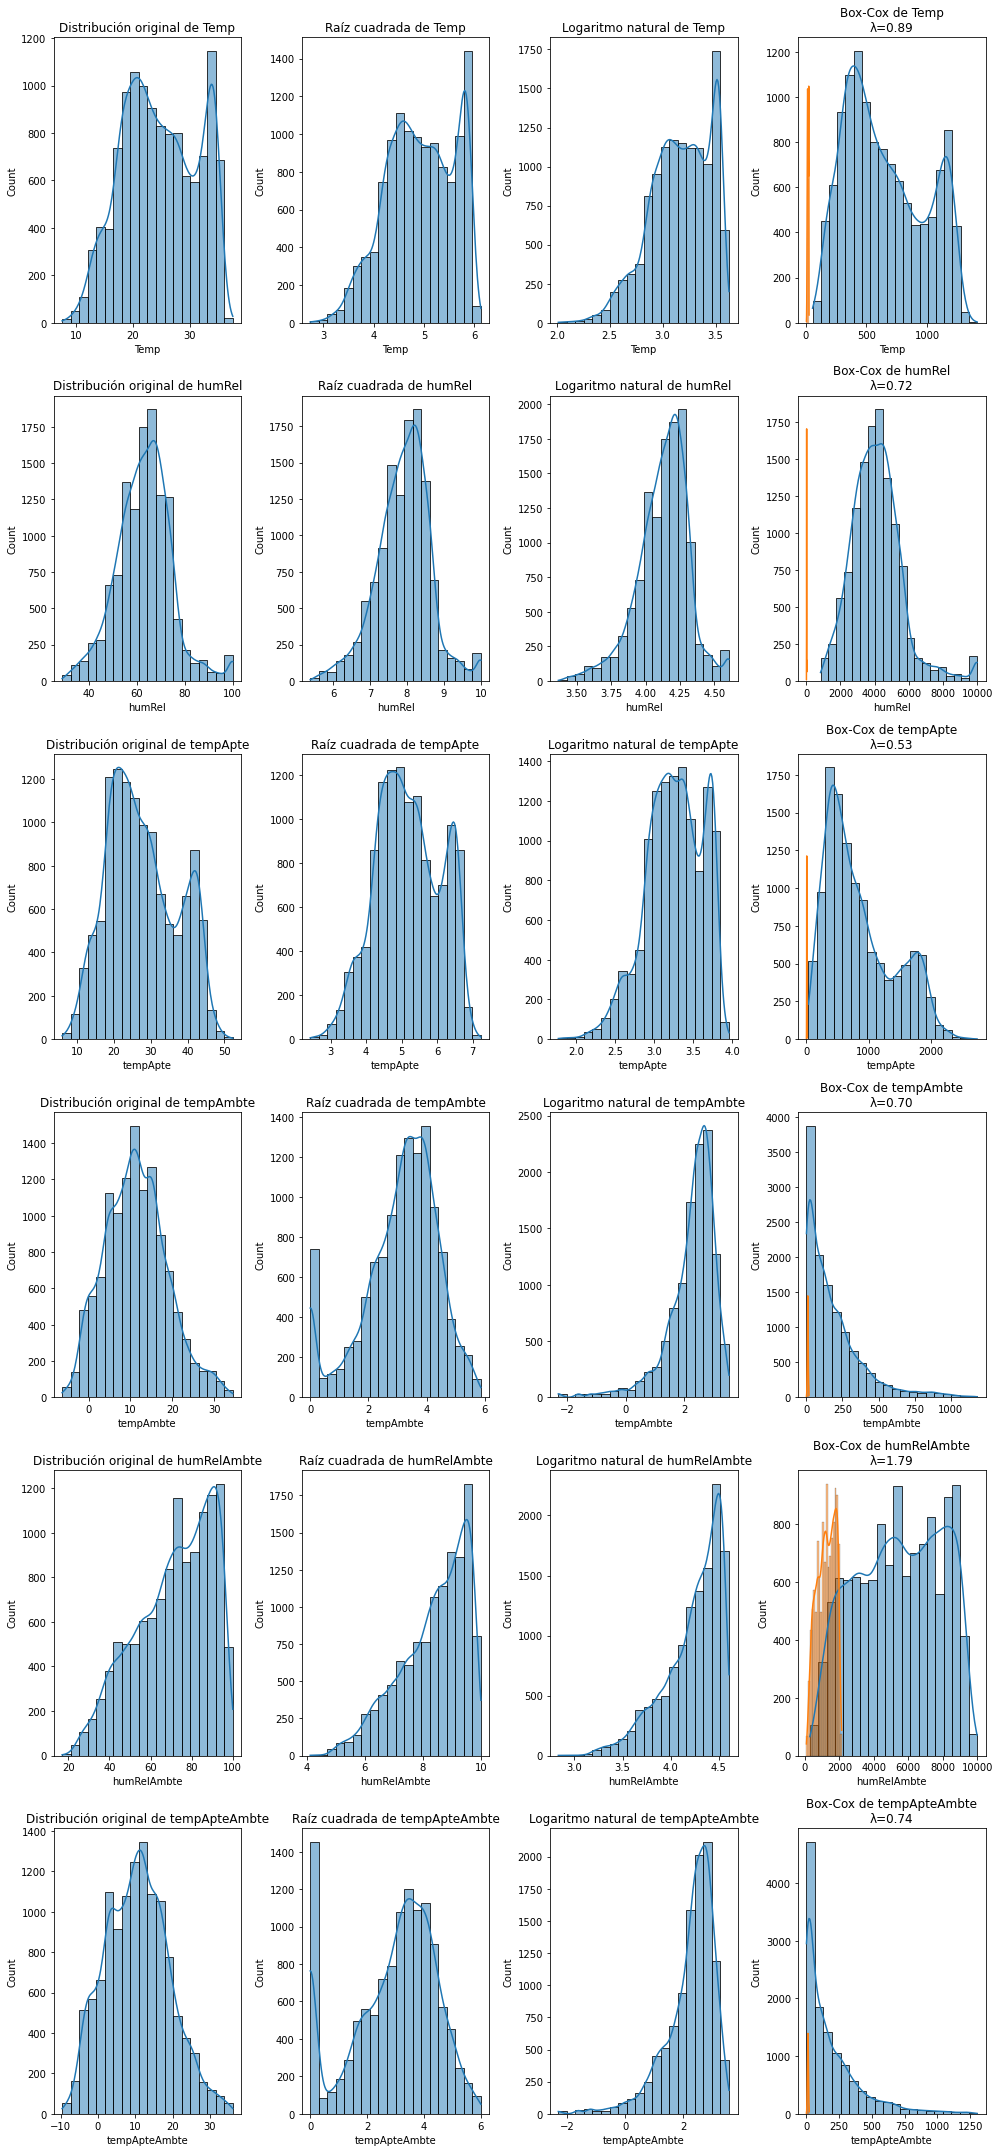

In [16]:
# Columnas numéricas de interés
columns_of_interest = ['Temp', 'humRel', 'tempApte', 'tempAmbte','humRelAmbte', 'tempApteAmbte']

# Crear una figura con subplots para cada columna y transformación
num_cols = len(columns_of_interest)
fig, axs = plt.subplots(num_cols, 4, figsize=(14, 5 * num_cols))

for i, col in enumerate(columns_of_interest):
    # Datos originales
    sns.histplot(df_hive_copy[col], bins=20, kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Distribución original de {col}')

    # Raíz cuadrada
    sqrt_data = np.sqrt(df_hive_copy[col].clip(lower=0))  # Clip para evitar valores negativos
    sns.histplot(sqrt_data, bins=20, kde=True, ax=axs[i, 1])
    axs[i, 1].set_title(f'Raíz cuadrada de {col}')

    # Logaritmo natural
    log_data = np.log(df_hive_copy[col].replace(0, np.nan).dropna())  # Manejar ceros y valores negativos
    sns.histplot(log_data, bins=20, kde=True, ax=axs[i, 2])
    axs[i, 2].set_title(f'Logaritmo natural de {col}')

    # Potencia 2
    power2_data = np.power(df_hive_copy[col], 2)
    sns.histplot(power2_data, bins=20, kde=True, ax=axs[i, 3])
    axs[i, 3].set_title(f'Potencia 2 de {col}')

    # Box-Cox
    # Para Box-Cox, necesitamos que los datos sean estrictamente positivos
    col_data = df_hive_copy[col]
    min_value = col_data.min()
    if min_value <= 0:
        col_data = col_data - min_value + 1  # Shift data to be positive

    col_data, fitted_lambda = stats.boxcox(col_data)
    sns.histplot(col_data, bins=20, kde=True, ax=axs[i, 3])
    axs[i, 3].set_title(f'Box-Cox de {col}\nλ={fitted_lambda:.2f}')

# Ajustar el layout
plt.tight_layout()
plt.show()

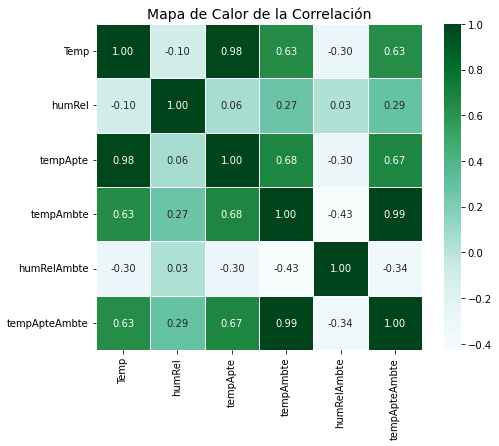

In [17]:
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

df_hive_numeric = df_hive_copy.select_dtypes(include=[float, int])
df_hive_corr = df_hive_numeric.corr(method='pearson')

# Crear el mapa de calor
ax = sns.heatmap(df_hive_corr, annot=True, cmap='BuGn', fmt='.2f', linewidths=0.5, square=True)

# Ajustar el título del gráfico
plt.title('Mapa de Calor de la Correlación', fontsize=14)

# Mostrar el gráfico
plt.show()

In [18]:
df_hive_copy.to_csv('hive.csv',index=False,sep=',')

In [19]:
from datetime import datetime
# Separar variables categóricas y numéricas
categorical_vars = df_hive_copy.select_dtypes(include=['object'])
numerical_vars = df_hive_copy.select_dtypes(include=['float', 'int', 'datetime'])

print("Variables categóricas:")
print(categorical_vars.head())

print("\nVariables numéricas:")
print(numerical_vars.head())

Variables categóricas:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

Variables numéricas:
       Fecha              Tiempo  Temp  humRel  tempApte  tempAmbte  \
0 2021-08-21 1900-01-01 14:00:00  32.8      47      36.6       28.8   
1 2021-08-21 1900-01-01 15:00:00  33.3      46      37.1       28.8   
2 2021-08-21 1900-01-01 16:00:00  33.5      46      37.4       28.9   
3 2021-08-21 1900-01-01 17:00:00  33.8      49      38.5       28.5   
4 2021-08-21 1900-01-01 18:00:00  33.8      51      38.8       27.5   

   humRelAmbte  tempApteAmbte  
0           33           29.1  
1           36           29.5  
2           35           29.5  
3           36           29.1  
4           40           28.4  


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Asegúrate de que numerical_vars solo contiene columnas numéricas
numerical_vars = df_hive_copy.select_dtypes(include=['int64', 'float64'])

# Escalar los datos numéricos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_vars)

# Si deseas seguir utilizando la columna de fechas, puedes hacer lo siguiente:
# Mantener las fechas y combinarlas con los datos escalados
date_vars = df_hive_copy.select_dtypes(include=['datetime64'])
result = pd.concat([date_vars.reset_index(drop=True), pd.DataFrame(scaled_data, columns=numerical_vars.columns)], axis=1)

# Aplicar PCA
pca = PCA()  # Puedes especificar el número de componentes si lo deseas
pca.fit(scaled_data)

# Obtener las componentes principales
principal_components = pca.transform(scaled_data)

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Mostrar las primeras filas del DataFrame de componentes principales
pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6
0,3.670793,-1.143661,1.553804,-1.411926,-0.041032,0.022937
1,3.702939,-1.219911,1.371831,-1.484315,-0.040342,0.000681
2,3.753616,-1.242552,1.404103,-1.452318,-0.041401,0.006585
3,3.792848,-1.076243,1.285770,-1.231756,-0.023193,0.010743
4,3.660838,-0.950419,1.055314,-1.098918,-0.015088,-0.011698


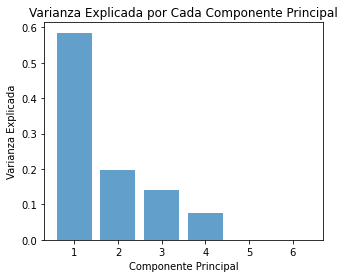

                    PC1       PC2       PC3       PC4       PC5       PC6
Temp           0.461314 -0.345465 -0.292576  0.290205 -0.683624 -0.175162
humRel         0.097577  0.847470 -0.058591  0.504536 -0.117323 -0.022787
tempApte       0.478261 -0.209304 -0.296529  0.389743  0.676054  0.174873
tempAmbte      0.493467  0.205061  0.089872 -0.438352 -0.173458  0.695790
humRelAmbte   -0.262586  0.146717 -0.902748 -0.299662 -0.009712  0.068385
tempApteAmbte  0.486286  0.234658  0.002276 -0.476839  0.177938 -0.670387

Variables más importantes para PC1:
tempAmbte        0.493467
tempApteAmbte    0.486286
tempApte         0.478261
Temp             0.461314
humRelAmbte      0.262586
Name: PC1, dtype: float64

Variables más importantes para PC2:
humRel           0.847470
Temp             0.345465
tempApteAmbte    0.234658
tempApte         0.209304
tempAmbte        0.205061
Name: PC2, dtype: float64

Variables más importantes para PC3:
humRelAmbte    0.902748
tempApte       0.296529
Temp       

In [21]:
# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Crear un gráfico de barras de la varianza explicada
plt.figure(figsize=(5, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.show()

# Obtener los loadings (coeficientes) de cada variable en cada componente
loadings = pca.components_

# Crear un DataFrame de loadings
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=numerical_vars.columns)

# Mostrar los loadings
print(loadings_df)

# Para cada componente, mostrar las variables más importantes
for i in range(loadings.shape[0]):
    print(f"\nVariables más importantes para PC{i+1}:")
    print(loadings_df.iloc[:, i].abs().sort_values(ascending=False)[:5])  # Mostrar las 5 variables con mayores loadings absolutos


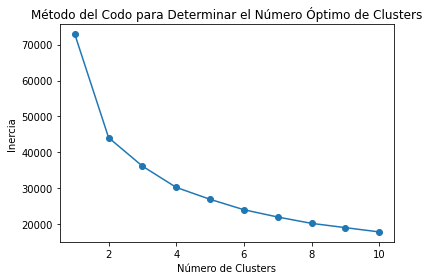

In [22]:
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning, message="divide by zero encountered in log")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in log")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in true_divide")

# Determinar el número óptimo de clusters usando el método del codo
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

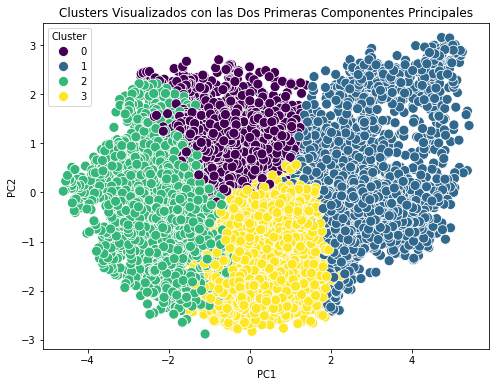

In [23]:
# Basado en el gráfico del codo, elegir el número óptimo de clusters
# Por ejemplo, si el codo se forma en k=3, entonces:
optimal_k = 4

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Agregar la información de clusters al DataFrame original
pca_df['Cluster'] = clusters

# Visualizar los clusters (ejemplo usando las dos primeras componentes principales)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Clusters Visualizados con las Dos Primeras Componentes Principales')
plt.show()

In [24]:
# Analizar las características de cada cluster
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    cluster_data = pca_df[pca_df['Cluster'] == i]
    print(cluster_data.describe().T)


Cluster 0:
          count      mean       std       min       25%       50%       75%  \
PC1      3421.0 -0.585401  0.775376 -2.678342 -1.145312 -0.599156 -0.024019   
PC2      3421.0  0.950025  0.567227 -0.471327  0.556645  0.947092  1.309005   
PC3      3421.0 -0.089074  0.666568 -1.877515 -0.585352 -0.212711  0.338896   
PC4      3421.0 -0.336366  0.482303 -1.710526 -0.623376 -0.363468 -0.061593   
PC5      3421.0 -0.023319  0.030657 -0.113504 -0.041615 -0.027030 -0.010786   
PC6      3421.0  0.003332  0.019094 -0.100346 -0.005749  0.004927  0.015443   
Cluster  3421.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

              max  
PC1      1.393354  
PC2      2.700219  
PC3      2.466874  
PC4      1.444729  
PC5      0.155777  
PC6      0.059615  
Cluster  0.000000  

Cluster 1:
          count      mean       std       min       25%       50%       75%  \
PC1      2483.0  2.793057  0.937588  0.820975  2.109428  2.624374  3.428852   
PC2      2483.0  0.157047

In [25]:
# Muestra para cada cluster, las variables originales más importantes
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    cluster_data = df_hive[pca_df['Cluster'] == i]

    # Calcula la media de cada variable numérica en el cluster
    cluster_means = cluster_data[numerical_vars.columns].mean()

    # Ordenar las variables por la diferencia absoluta de su media en el cluster con la media global
    global_means = numerical_vars.mean()
    importance = (cluster_means - global_means).abs().sort_values(ascending=False)

    print("Variables más importantes:")
    print(importance.head())  # Mostrar las 5 variables más importantes


Cluster 0:
Variables más importantes:
humRelAmbte      8.641964
humRel           6.743922
tempApte         5.578932
Temp             4.259013
tempApteAmbte    0.785449
dtype: float64

Cluster 1:
Variables más importantes:
humRelAmbte      18.567531
tempApte         11.872542
tempApteAmbte    11.452732
tempAmbte        10.237299
Temp              7.565235
dtype: float64

Cluster 2:
Variables más importantes:
tempApteAmbte    10.328741
tempApte          9.067964
tempAmbte         8.766815
Temp              6.296584
humRel            3.066137
dtype: float64

Cluster 3:
Variables más importantes:
humRel         8.073999
tempApte       4.873908
Temp           4.290197
humRelAmbte    3.569245
tempAmbte      0.319220
dtype: float64


In [26]:
# Pruebas estadísticas para comparar las medias del cluster con las medias globales y que se vea como un informe bine presentado

from scipy import stats

# Realizar pruebas estadísticas para comparar las medias del cluster con las medias globales
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    cluster_data = df_hive[pca_df['Cluster'] == i]

    for col in numerical_vars.columns:
        # Prueba t de Student para comparar la media del cluster con la media global
        result = stats.ttest_ind(cluster_data[col], df_hive[col], equal_var=False)

        print(f"  {col}:")
        print(f"    Media del cluster: {cluster_data[col].mean():.2f}")
        print(f"    Media global: {df_hive[col].mean():.2f}")
        print(f"    Valor p: {result.pvalue:.3f}")

        # Interpretar el resultado de la prueba t
        if result.pvalue < 0.05:
            print("    La diferencia de medias es estadísticamente significativa.")
        else:
            print("    La diferencia de medias no es estadísticamente significativa.")

# Generar un informe bien presentado
print("\n\nInforme de Comparación de Medias entre Clusters y Datos Globales")
print("------------------------------------------------------------")

for i in range(optimal_k):
    print(f"\nCluster {i}:")
    cluster_data = df_hive[pca_df['Cluster'] == i]

    for col in numerical_vars.columns:
        result = stats.ttest_ind(cluster_data[col], df_hive[col], equal_var=False)

        print(f"  {col}:")
        if result.pvalue < 0.05:
            difference = cluster_data[col].mean() - df_hive[col].mean()
            if difference > 0:
                comparison = "mayor"
            else:
                comparison = "menor"
            print(f"    La media del cluster es significativamente {comparison} que la media global (p-valor = {result.pvalue:.3f}).")
        else:
            print(f"    No hay diferencia significativa entre la media del cluster y la media global (p-valor = {result.pvalue:.3f}).")



Cluster 0:
  Temp:
    Media del cluster: 20.42
    Media global: 24.68
    Valor p: 0.000
    La diferencia de medias es estadísticamente significativa.
  humRel:
    Media del cluster: 69.97
    Media global: 63.22
    Valor p: 0.000
    La diferencia de medias es estadísticamente significativa.
  tempApte:
    Media del cluster: 22.07
    Media global: 27.65
    Valor p: 0.000
    La diferencia de medias es estadísticamente significativa.
  tempAmbte:
    Media del cluster: 11.75
    Media global: 11.37
    Valor p: 0.000
    La diferencia de medias es estadísticamente significativa.
  humRelAmbte:
    Media del cluster: 80.04
    Media global: 71.40
    Valor p: 0.000
    La diferencia de medias es estadísticamente significativa.
  tempApteAmbte:
    Media del cluster: 11.37
    Media global: 10.58
    Valor p: 0.000
    La diferencia de medias es estadísticamente significativa.

Cluster 1:
  Temp:
    Media del cluster: 32.24
    Media global: 24.68
    Valor p: 0.000
    La dife

In [27]:
# Interpretaciones las variables importantes

for i in range(optimal_k):
    print(f"\nInterpretación del Cluster {i}:")
    cluster_data = df_hive[pca_df['Cluster'] == i]

    # Calcula la media de cada variable numérica en el cluster
    cluster_means = cluster_data[numerical_vars.columns].mean()

    # Ordenar las variables por la diferencia absoluta de su media en el cluster con la media global
    global_means = numerical_vars.mean()
    importance = (cluster_means - global_means).abs().sort_values(ascending=False)

    # Variables más importantes y su interpretación
    top_variables = importance.head()
    for variable in top_variables.index:
        difference = cluster_means[variable] - global_means[variable]
        if difference > 0:
            comparison = "más alta"
        else:
            comparison = "más baja"

        print(f"  - {variable}: Este cluster tiende a tener valores de {variable} {comparison} que el promedio.")

        # Interpretación específica basada en el conocimiento del dominio
        if variable == 'Temp':
            if comparison == "más alta":
                print("    Esto podría indicar un periodo de mayor actividad dentro de la colmena o condiciones climáticas más cálidas.")
            else:
                print("    Esto podría indicar un periodo de menor actividad o condiciones climáticas más frías.")
        elif variable == 'humRel':
            if comparison == "más alta":
                print("    Esto podría indicar un ambiente más húmedo dentro de la colmena, posiblemente debido a mayor condensación o menor ventilación.")
            else:
                print("    Esto podría indicar un ambiente más seco, posiblemente debido a menor humedad ambiental o mayor ventilación.")


Interpretación del Cluster 0:
  - humRelAmbte: Este cluster tiende a tener valores de humRelAmbte más alta que el promedio.
  - humRel: Este cluster tiende a tener valores de humRel más alta que el promedio.
    Esto podría indicar un ambiente más húmedo dentro de la colmena, posiblemente debido a mayor condensación o menor ventilación.
  - tempApte: Este cluster tiende a tener valores de tempApte más baja que el promedio.
  - Temp: Este cluster tiende a tener valores de Temp más baja que el promedio.
    Esto podría indicar un periodo de menor actividad o condiciones climáticas más frías.
  - tempApteAmbte: Este cluster tiende a tener valores de tempApteAmbte más alta que el promedio.

Interpretación del Cluster 1:
  - humRelAmbte: Este cluster tiende a tener valores de humRelAmbte más baja que el promedio.
  - tempApte: Este cluster tiende a tener valores de tempApte más alta que el promedio.
  - tempApteAmbte: Este cluster tiende a tener valores de tempApteAmbte más alta que el pro

In [28]:
# Si no tienes esta información, deberás proporcionar una forma de asignar un ID de colmena
df_hive['Hive'] = np.random.randint(1, 4, df_hive.shape[0])  # Ejemplo: asignar aleatoriamente IDs de colmena del 1 al 3

# Define umbrales para cada variable
umbrales = {
    'Temp': {'bueno': (30, 35), 'malo': (25, 29), 'peligro': (None, 24)},
    'humRel': {'bueno': (50, 70), 'malo': (40, 49), 'peligro': (None, 39)},
    # ... define umbrales para otras variables relevantes
}

# Crea una función para evaluar la salud de la colmena
def evaluar_salud(fila):
    salud = 'bueno'  # Valor por defecto
    for variable, rangos in umbrales.items():
        valor = fila[variable]
        if valor < rangos['peligro'][1]:
            salud = 'peligro'
            break
        elif rangos['malo'][0] <= valor <= rangos['malo'][1]:
            salud = 'malo'
    return salud

# Aplica la función a cada fila del DataFrame
df_hive['Salud'] = df_hive.apply(evaluar_salud, axis=1)

# Muestra el resultado
print(df_hive[['Hive', 'Fecha', 'Temp', 'humRel', 'Salud']])  # Muestra las columnas relevantes

# Resumen de la salud de las colmenas
resumen_salud = df_hive.groupby(['Hive', 'Salud']).size().unstack(fill_value=0)
print("\nResumen de la salud de las colmenas:")
print(resumen_salud)


       Hive       Fecha  Temp  humRel  Salud
0         2  21.08.2021  32.8      47   malo
1         3  21.08.2021  33.3      46   malo
2         3  21.08.2021  33.5      46   malo
3         3  21.08.2021  33.8      49   malo
4         2  21.08.2021  33.8      51  bueno
...     ...         ...   ...     ...    ...
12142     1   1.05.2022  33.9      69  bueno
12143     2   1.05.2022  34.1      71  bueno
12144     2   1.05.2022  34.5      71  bueno
12145     2   1.05.2022  35.0      71  bueno
12146     1   1.05.2022  34.9      70  bueno

[12147 rows x 5 columns]

Resumen de la salud de las colmenas:
Salud  bueno  malo  peligro
Hive                       
1       1178   750     2002
2       1296   853     2042
3       1216   786     2024


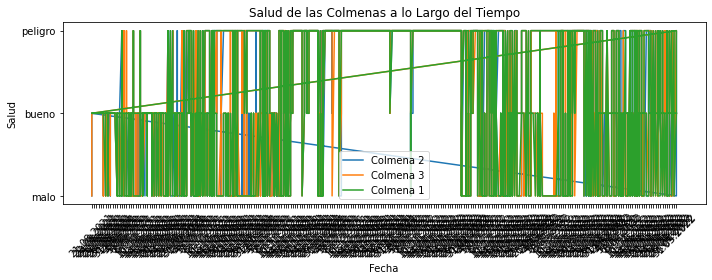

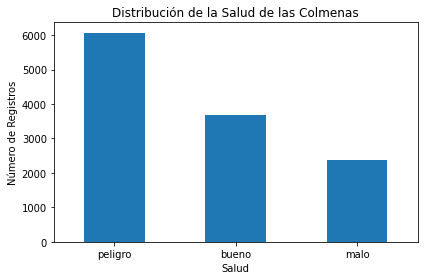

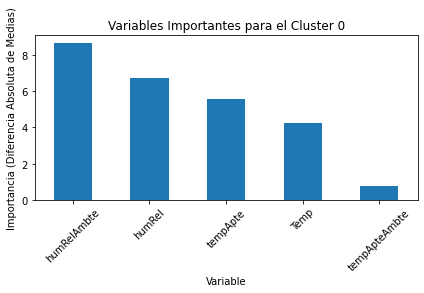

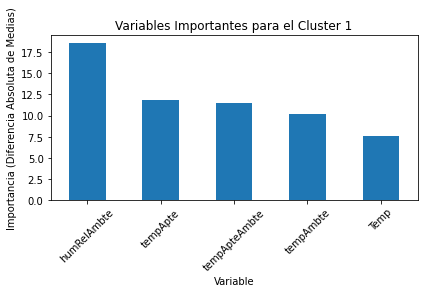

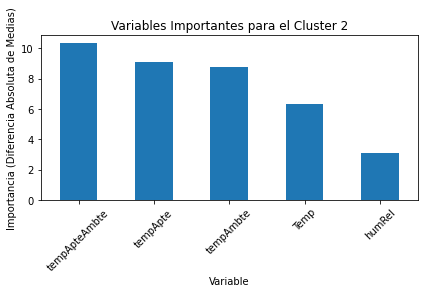

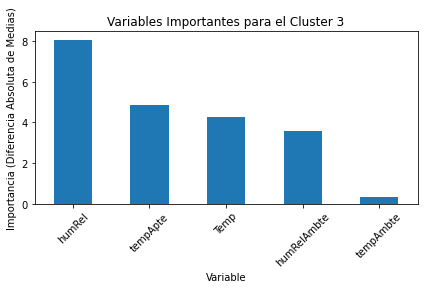

In [29]:
import matplotlib.pyplot as plt

# Visualización 1: Salud de las colmenas a lo largo del tiempo
plt.figure(figsize=(10, 4))
for hive in df_hive['Hive'].unique():
    hive_data = df_hive[df_hive['Hive'] == hive]
    plt.plot(hive_data['Fecha'], hive_data['Salud'], label=f'Colmena {hive}')
plt.xlabel('Fecha')
plt.ylabel('Salud')
plt.title('Salud de las Colmenas a lo Largo del Tiempo')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualización 2: Distribución de la salud de las colmenas
plt.figure(figsize=(6, 4))
df_hive['Salud'].value_counts().plot(kind='bar')
plt.xlabel('Salud')
plt.ylabel('Número de Registros')
plt.title('Distribución de la Salud de las Colmenas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualización 3: Variables importantes por cluster
for i in range(optimal_k):
    plt.figure(figsize=(6, 4))
    cluster_data = df_hive[pca_df['Cluster'] == i]
    cluster_means = cluster_data[numerical_vars.columns].mean()
    global_means = numerical_vars.mean()
    importance = (cluster_means - global_means).abs().sort_values(ascending=False)
    top_variables = importance.head()
    top_variables.plot(kind='bar')
    plt.xlabel('Variable')
    plt.ylabel('Importancia (Diferencia Absoluta de Medias)')
    plt.title(f'Variables Importantes para el Cluster {i}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Agrega una columna 'Target' que indique si la colmena está en peligro o no
df_hive['Target'] = df_hive['Salud'].apply(lambda x: 1 if x == 'peligro' else 0)

# Define variables predictoras y objetivo
numerical_vars = df_hive.select_dtypes(include=[np.number])  # Usa np.number en lugar de pd.np.number
X = numerical_vars  # Variables predictoras
y = df_hive['Target']  # Variable objetivo

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena un modelo de clasificación (por ejemplo, Regresión Logística)
model = LogisticRegression()
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

Exactitud: 1.0

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1219
           1       1.00      1.00      1.00      1211

    accuracy                           1.00      2430
   macro avg       1.00      1.00      1.00      2430
weighted avg       1.00      1.00      1.00      2430


Matriz de Confusión:
 [[1219    0]
 [   0 1211]]


In [31]:
# Inicializa un DataFrame con las mismas columnas que X
nuevos_datos = pd.DataFrame(columns=X.columns)

# Agrega una fila de datos al DataFrame usando pd.concat
new_row = pd.DataFrame([{
    'Temp': 24,
    'humRel': 35,
    # Añade los demás valores según las columnas de X
}])

nuevos_datos = pd.concat([nuevos_datos, new_row], ignore_index=True)

# Reemplaza valores faltantes con 0 (o el valor apropiado)
nuevos_datos = nuevos_datos.fillna(0)

In [32]:
# Realiza predicciones con el modelo entrenado
predicciones = model.predict(nuevos_datos)

# Interpreta las predicciones
for i, prediccion in enumerate(predicciones):
    if prediccion == 1:
        print(f"La colmena {i+1} está en peligro.")
    else:
        print(f"La colmena {i+1} está saludable.")

La colmena 1 está en peligro.
